# APS 1 - Aletas

### Realizando os imports

In [1]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

### Definindo parâmetros

Seleciona-se a secção transversal da aleta retangular, bem como os parâmetros de cálculo.

In [2]:
L = 0.2 # Comprimento da aleta [m]
t = 20e-3 # Espessura da aleta [m]
w = 0.24 # Largura da aleta [m]

P = 2*(t+w) # Perímetro da seção transversal [m]

h = 20 # Coeficiente de convecção em [W/(m^2 * K)]

A_Lt = L * t # Área lateral [m^2]
A_wt = w * t # Área frontal [m^2]
A_Lw = L * w # Área da base [m^2]
A_ext = (2 * A_Lt) + A_wt + (2 * A_Lw) # Área da superfície externa [m^2]

k_al = 240 # Condutividade do material em [W/(m * K)]
T_inf = 25+273 # Temperatura do ambiente [K]
T_b = 100+273 # temperatura da base [K]
x = L # Condição de contorno na extremidade da aleta [m]



m = sqrt((h*P)/(k_al*A_wt))
M = sqrt(((h*P)/(k_al*A_wt))) * (T_b - T_inf)

### Questão I.1 
Qual a temperatura na extremidade da aleta (```T_al```)? Apresente um gráfico da distribuição de temperatura (```T_analitica```) ao longo do comprimento da aleta. Use legenda, identifique os eixos e as unidades usadas.

In [3]:
def calcula_temperatura_pontual_aleta(h, k, L, x, m, T_b, T_inf):
    hmk = h / (m * k) # abstração de valor repetido
    numerador = cosh(m * (L - x)) + hmk * sinh(m * (L - x))
    denominador = cosh(m * L) + hmk * sinh(m * L)
    distribuicao_de_temperaturas = numerador / denominador
    T_al = (distribuicao_de_temperaturas * (T_b - T_inf)) + T_inf
    return T_al

Temperatura na extremidade da aleta: 360.306 K


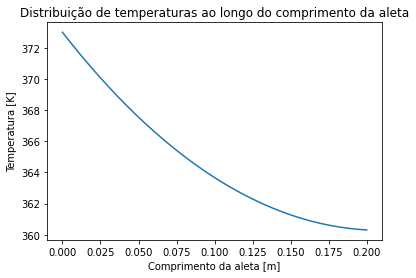

In [4]:
# Gráfico da distribuição de temperaturas ao longo do comprimento da aleta

l_aleta_dist_temp = []
step=0.001; l_aleta_x = np.arange(0, L+step, step)

for x in l_aleta_x:
    T_al = (calcula_temperatura_pontual_aleta(h, k_al, L, x, m, T_b, T_inf))
    l_aleta_dist_temp.append(T_al)
print(f"Temperatura na extremidade da aleta: {round(l_aleta_dist_temp[-1], 3)} K")


# plote o gráfico com eixo x sendo ``l_aleta_x`` e eixo y sendo ``l_aleta_dist_temp``
plt.plot(l_aleta_x, l_aleta_dist_temp)
plt.xlabel("Comprimento da aleta [m]")
plt.ylabel("Temperatura [K]")
plt.title("Distribuição de temperaturas ao longo do comprimento da aleta")
plt.show()

### Questão I.2
Determine a taxa de transferência de calor.

In [5]:

def calcula_transferencia_de_calor(h, P, k, A, L, x, T_inf, T_b):
    """
    Output: taxa de transferência de calor por convecção
    """
    M = sqrt(((h*P)/(k*A))) * (T_b - T_inf)
    m = sqrt(((h*P)/(k*A)))
    # calcula_M
    # calcula_m())
    hmk = h / (m * k)
    numerador = sinh(m * L) + hmk * cosh(m * L)
    denominador = cosh(m * L) + hmk * sinh(m * L)
    taxa_transferencia_de_calor = M * (numerador / denominador)
    return taxa_transferencia_de_calor

taxa_transferencia_de_calor = calcula_transferencia_de_calor(h, P, k_al, A_wt, L, x, T_inf, T_b)

print(f"Taxa de transferência de calor: {round(taxa_transferencia_de_calor,3)} W")


Taxa de transferência de calor: 125.548 W


### Questão I.3
Determine a eficiência da aleta.

In [6]:
eficiencia = taxa_transferencia_de_calor/(h * A_ext * (T_b - T_inf))
print(f"Eficiênica da aleta: {round(eficiencia,3)}")

Eficiênica da aleta: 0.769


### Questão I.4
Determine a efetividade da aleta.

In [7]:
efetividade = taxa_transferencia_de_calor/(h * A_wt * (T_b - T_inf))
print(f"Efetividade: {round(efetividade,3)}")

Efetividade: 17.437


### Questão I.5
Assumindo a hipótese de aleta infinita, determine a taxa de transferência de calor.

In [8]:
# taxa_transferencia_de_calor_aleta_infinita = (np.exp(-m*x) * (T_b - T_inf)) + T_inf
print(f"Taxa de transferência de calor: {round(M,3)} W, considerando a aleta infinita")

Taxa de transferência de calor: 225.347 W, considerando a aleta infinita


### Questão I.6
Compare o resultado obtido no item 2 com o resultado do item 5, assumindo que foram 
obtidos com modelos diferentes.

In [9]:
print(f"O resultado obtido em I.5 foi {round(M/taxa_transferencia_de_calor,2)} vezes maior que em I.2, sendo:\n\n - a taxa de transferência de calor da aleta finita: {round(taxa_transferencia_de_calor,3)} W;\n - e da aleta infinita {round(M,3)} W;\n\nCom isso, conlui-se que o ganho com a aleta infinita não é justificável,\ndado sua complexidade teorética de implementação.")

O resultado obtido em I.5 foi 1.79 vezes maior que em I.2, sendo:

 - a taxa de transferência de calor da aleta finita: 125.548 W;
 - e da aleta infinita 225.347 W;

Com isso, conlui-se que o ganho com a aleta infinita não é justificável,
dado sua complexidade teorética de implementação.


### Questão I.7
Apresente o desenvolvimento matemático para determinar qual deveria ser o comprimento da aleta para que a hipótese de aleta infinita forneça uma medida precisa para a taxa de transferência de calor.

Para uma aleta infinita, temos que: 

$\theta_L = 0$;

$T(L) = T_{amb}$.

Portanto, podemos considerar uma condição adiabática na extremidade da aleta. Com isso, concluímos que:

$M \approx M \cdot \tanh(m \cdot L)$

$\tanh(m \cdot L) \geq 0.99$


In [10]:
L = 0
THRESHOLD = 1e-4

def distribuicao_temperatura_aleta_infinita(m, x, T_b, T_inf):
    return (np.exp(-m*x) * (T_b - T_inf)) + T_inf

T_aleta_infinita = distribuicao_temperatura_aleta_infinita(m, l_aleta_x[-1], T_b, T_inf)

is_temp_aleta_infinita = True
while (is_temp_aleta_infinita):
    area_superficie_infinita = A_wt + P*L
    m = sqrt((h*P)/(k_al*area_superficie_infinita))
    temp = distribuicao_temperatura_aleta_infinita(m, L, T_b, T_inf)
    is_temp_aleta_infinita = not(temp - T_aleta_infinita < THRESHOLD)
    L += THRESHOLD

print(f"O comprimento mínimo que a aleta deve adotar é: {round(L,3)} m.")

O comprimento mínimo que a aleta deve adotar é: 4.343 m.
